In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [3]:
df_main = pd.read_csv('D:/Towhid/Documents/Data Science/Datasets/Absenteeism_at_work.csv', sep = ';')

df_main.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [4]:
df_main.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
df_main['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
5        7
40       7
32       6
64       3
80       3
120      3
56       2
112      2
7        1
48       1
104      1
Name: Absenteeism time in hours, dtype: int64

In [6]:
df_main['Body mass index'].value_counts()


31    147
25    126
24     86
23     75
28     59
19     46
30     40
22     35
27     24
32     24
29     23
21     22
38     19
33      6
36      5
35      2
34      1
Name: Body mass index, dtype: int64

#### In the column 'Absenteeism time in hours' , there seems to be a total of 44 observations which are 0. Since we are aiming to predict absenteeism time, a value of 0 is not only counterproductive to our cause but it is potentially harmful to any ML model we hope to apply.

In [7]:
df_main = df_main[df_main['Absenteeism time in hours'] > 0]

df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 736
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               696 non-null    int64  
 1   Reason for absence               696 non-null    int64  
 2   Month of absence                 696 non-null    int64  
 3   Day of the week                  696 non-null    int64  
 4   Seasons                          696 non-null    int64  
 5   Transportation expense           696 non-null    int64  
 6   Distance from Residence to Work  696 non-null    int64  
 7   Service time                     696 non-null    int64  
 8   Age                              696 non-null    int64  
 9   Work load Average/day            696 non-null    float64
 10  Hit target                       696 non-null    int64  
 11  Disciplinary failure             696 non-null    int64  
 12  Education             

In [8]:
df_main['Month of absence'].groupby(level=0).count().sum()

696

In [9]:
df_main['Disciplinary failure'].value_counts()

0    696
Name: Disciplinary failure, dtype: int64

#### Within our updated dataframe, the variable 'Disciplinary Failure' has only 1 common observation : 0. Due to this absence of variability, it is safe to drop this column entirely.

In [10]:
df_main = df_main.drop('Disciplinary failure', 1)


In [11]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 736
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               696 non-null    int64  
 1   Reason for absence               696 non-null    int64  
 2   Month of absence                 696 non-null    int64  
 3   Day of the week                  696 non-null    int64  
 4   Seasons                          696 non-null    int64  
 5   Transportation expense           696 non-null    int64  
 6   Distance from Residence to Work  696 non-null    int64  
 7   Service time                     696 non-null    int64  
 8   Age                              696 non-null    int64  
 9   Work load Average/day            696 non-null    float64
 10  Hit target                       696 non-null    int64  
 11  Education                        696 non-null    int64  
 12  Son                   

### Data Segmentation: Can my variables be clustered under common subcategories to better aid analysis ?

Independent : Reasons for absences

Biological: Age, Weight,Height,Body mass index

Time : Month of absence, Day of the week, Seasons

Commuting: Transportation expense, Distance from residence
Workload: Service time, Work load Average, Hit target

Social: Social drinker, Social smoker,Education

Familial: Son,Pet

Other: Disciplinary Failure

In [12]:
df_main.drop('ID',axis =1 , inplace = True)
df_main

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,4
2,23,7,4,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,2
5,23,7,6,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,22,7,4,1,361,52,3,28,264.604,93,1,1,1,0,4,80,172,27,8
733,22,7,4,1,225,26,9,28,264.604,93,1,1,0,0,2,69,169,24,8
734,13,7,2,1,369,17,12,31,264.604,93,1,3,1,0,0,70,169,25,80
735,14,7,3,1,289,36,13,33,264.604,93,1,2,1,0,1,90,172,30,8


In [13]:
df_main['Reason for absence'].value_counts()

df_main['Month of absence'].value_counts().rename_axis('Month of absence').reset_index(name='counts')

,Month of absence,counts
0,3,83
1,2,72
2,7,65
3,10,62
4,5,58
5,11,57
6,8,54
7,4,52
8,6,51
9,1,49


## Automation Script for creating Charts for Categorical variable plots:

In [14]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                                 'Sep','Oct','Nov','Dec']

days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

reasons = ['Certain infectious and parasitic diseases',
                                                       'Neoplasms',
                                                       'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
                                                       'Endocrine, nutritional and metabolic diseases',
                                                        'Mental and behavioural disorders',
                                                        'Diseases of the nervous system',
                                                        'Diseases of the eye and adnexa',
                                                        'Diseases of the ear and mastoid process',
                                                        'Diseases of the circulatory system',
                                                        'Diseases of the respiratory system',
                                                        'Diseases of the digestive system',
                                                        'Diseases of the skin and subcutaneous tissue',
                                                        'Diseases of the musculoskeletal system and connective tissue',
                                                        'Diseases of the genitourinary system',
                                                        'Pregnancy, childbirth and the puerperium',
                                                        'Certain conditions originating in the perinatal period',
                                                        'Congenital malformations, deformations, and chromosomal abnormalities',
                                                        'Symptoms,signs and abnormal clinical and laboratory findings, not elsewhere classified',
                                                        'Injury, poisoning and certain other consequences of external causes',
                                                        'External causes of morbididty and mortality',
                                                        'Factors influencing health status and ocntact with health services',
                                                        'patient follow-up',
                                                        'medical consultation',
                                                        'blood donation',
                                                        'laboratory examination',
                                                        'unjustified absence',
                                                        'physiotherapy',
                                                        'dental consulation']

seasons = ['summer','autumn','winter','spring']

education = ['high school', 'postgraduate', 'graduate', 'doctor']

def ChartCreator(df, col_name,  start, end, var_list,title, width =8, height =8, font_size = 1):
    
    vars_counts = df[col_name].value_counts().rename_axis(col_name).reset_index(name = 'count')
    
    var_num = [i for i in range(start,end)]
    varz = var_list
    
    vars_counts['Percentage'] = (vars_counts['count']*100)/(vars_counts['count'].sum())
    vars_counts[col_name] = vars_counts[col_name].map(dict(zip(var_num,varz)))
    vars_counts = vars_counts.sort_values(by = 'Percentage',
                                         ascending = False)
    
    sns.set(rc={'figure.figsize':(width, height)})


    sns.set(style="darkgrid")
    
    sns.set(font_scale = font_size )

    plot = sns.barplot(x = 'Percentage', y = col_name, data = vars_counts).set_title(title)
    
    
    return plot

### Can we find the proportion of absentees grouped by each reason for absence ?

Text(0.5, 1.0, 'Percentage of absentees by reasons for absence')

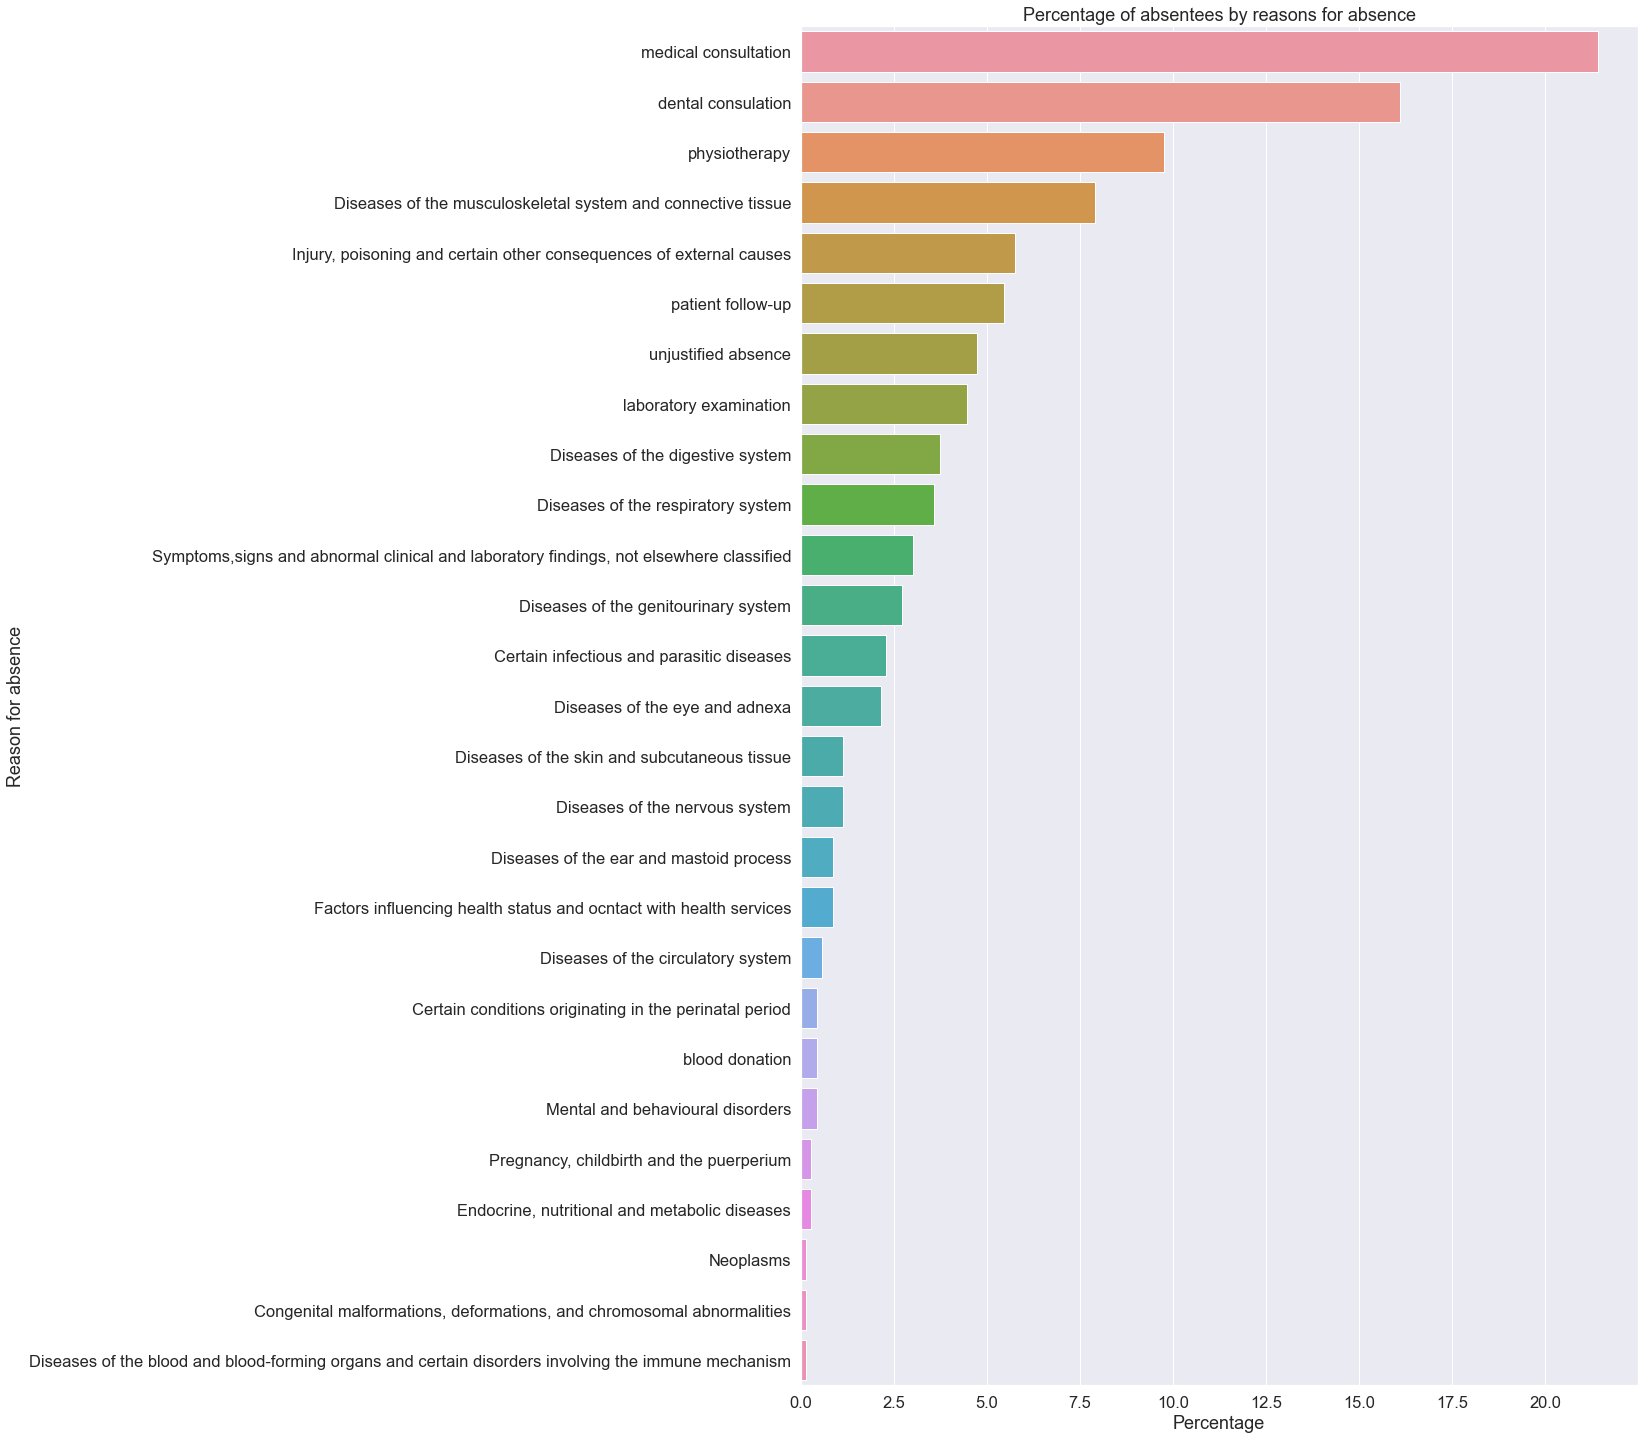

In [15]:
ChartCreator(df_main, 'Reason for absence',1, 29, reasons, 'Percentage of absentees by reasons for absence', width = 15, height = 25, font_size = 1.5)

### Can we find the percentage of absentees as per the month they called in absent ?

Text(0.5, 1.0, 'Percentage of absentees by month')

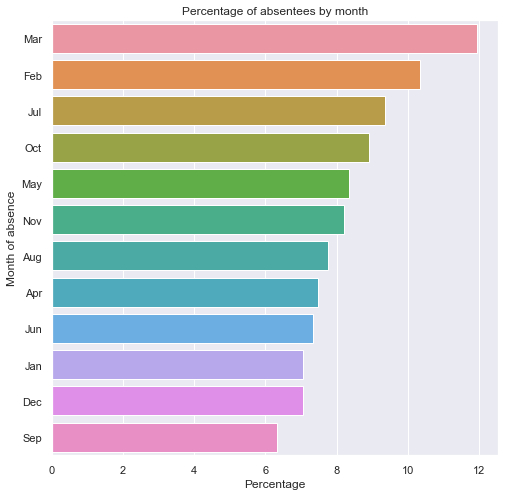

In [16]:
ChartCreator(df_main, 'Month of absence', 1, 13, months,'Percentage of absentees by month')

### Can we find the percentage of absentees as per the season they called absent in ?

Text(0.5, 1.0, 'Percentage of absentees by season')

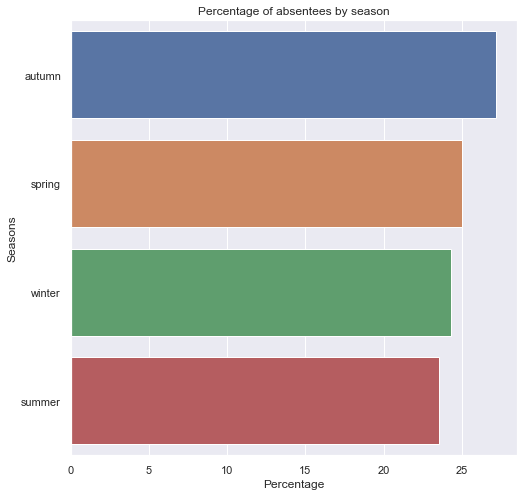

In [17]:
ChartCreator(df_main, 'Seasons', 1, 5, seasons, 'Percentage of absentees by season')

### Can we find the percentage of absentees as per the day of the week they called absent in ?

Text(0.5, 1.0, 'Percentage of absentees by day')

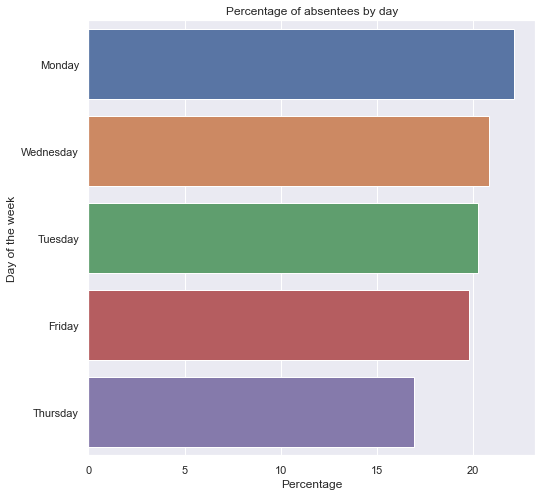

In [18]:
ChartCreator(df_main, 'Day of the week', 2, 7, days, 'Percentage of absentees by day')

Text(0.5, 1.0, 'Percentage of absentees by education level')

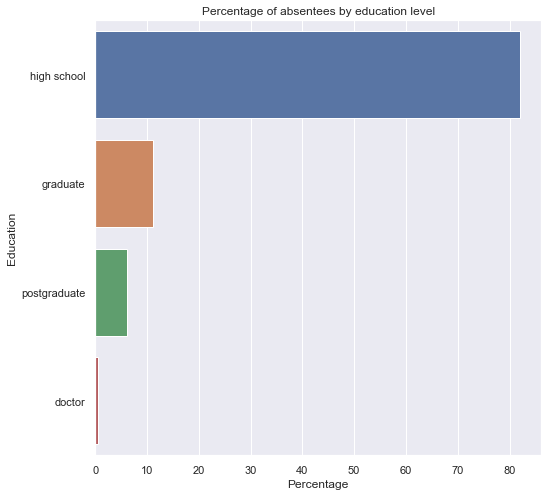

In [19]:
ChartCreator(df_main, 'Education', 1, 5, education,'Percentage of absentees by education level')

## BIVARIATE ANALYSIS 

### Pairplot : Absenteeism time vs Variables related to Commuting

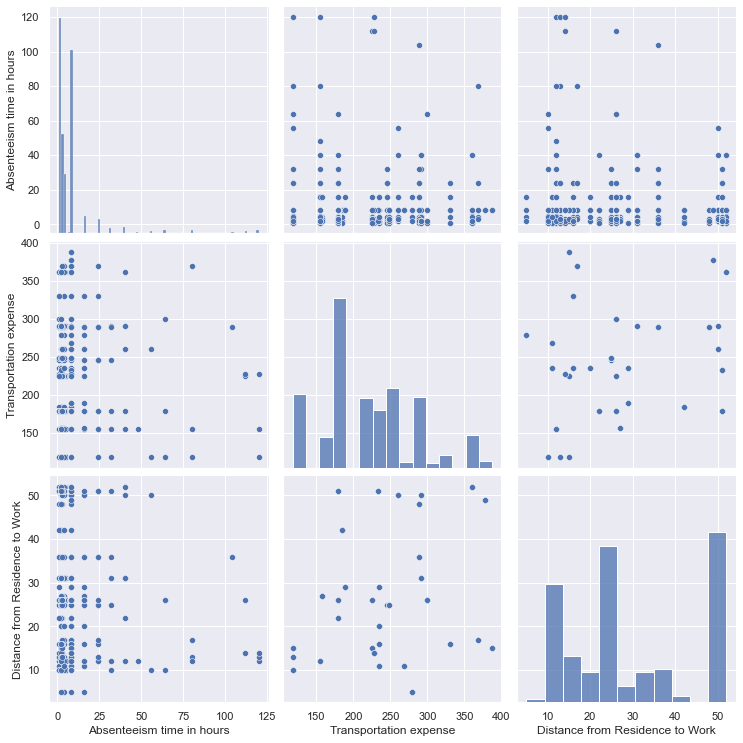

In [20]:
sns.set()

cols = ['Absenteeism time in hours','Transportation expense', 'Distance from Residence to Work']

sns.pairplot(df_main[cols], height = 3.5)
plt.show()

### Pairplot : Absenteeism time vs Variables related to Biological Factors

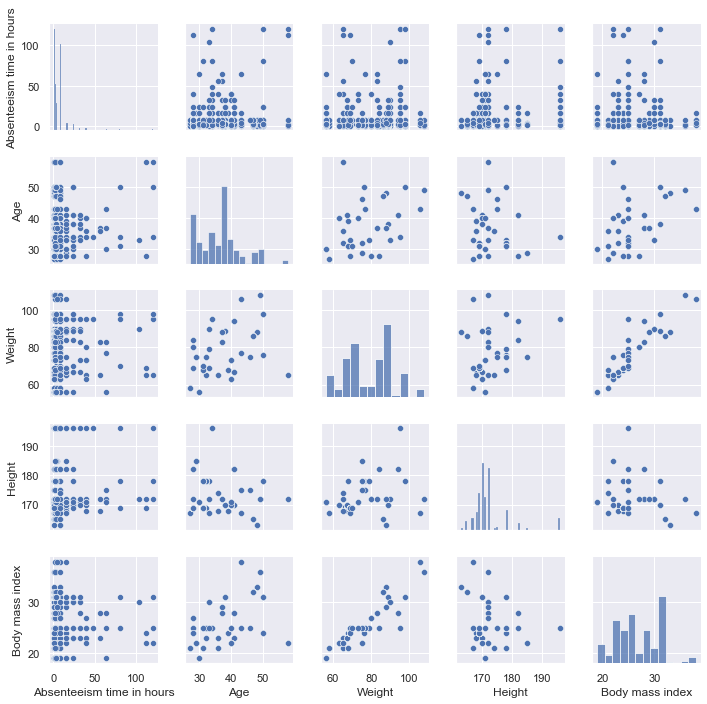

In [21]:
sns.set()

cos_1 = ['Absenteeism time in hours', 'Age', 'Weight', 'Height', 'Body mass index']

sns.pairplot(df_main[cos_1], height = 2)

plt.show()



### Pairplot : Absenteeism time vs Variables related to Household and Familial Data

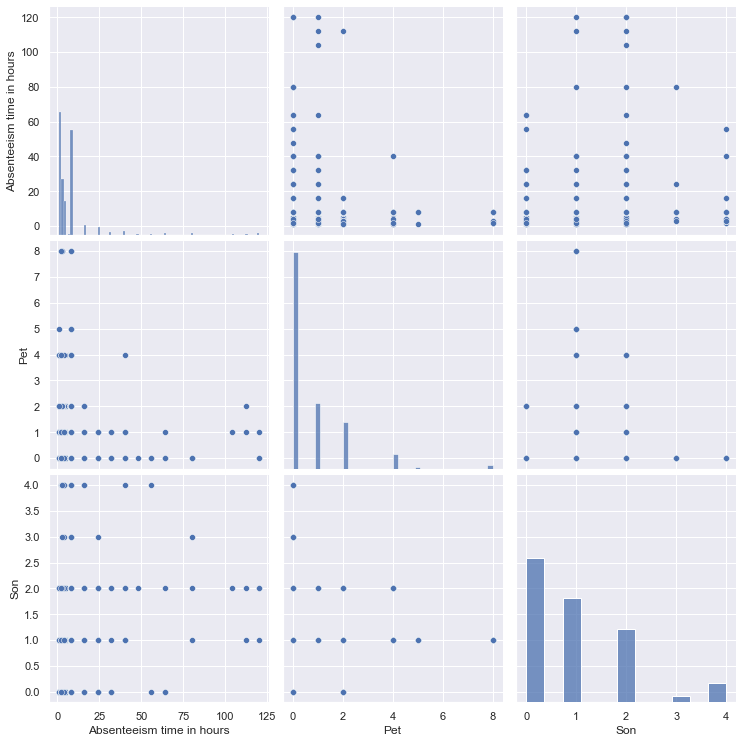

In [22]:
sns.set()

cols_2 = ['Absenteeism time in hours','Pet','Son']

sns.pairplot(df_main[cols_2], height = 3.5)

plt.show()

### Pairplot : Absenteeism time vs Variables related to measures of service at work

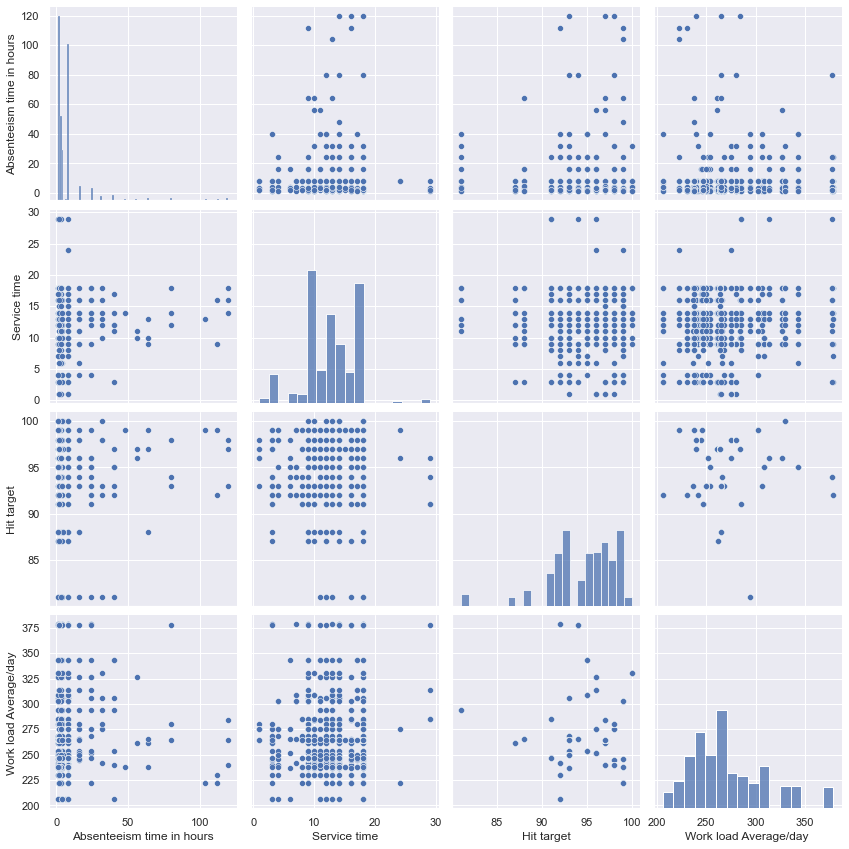

In [23]:
sns.set()

cols_3 = ['Absenteeism time in hours', 'Service time', 'Hit target','Work load Average/day ']

sns.pairplot(df_main[cols_3], height = 3)

plt.show()

### What percentage of the absentee group were social drinkers ?

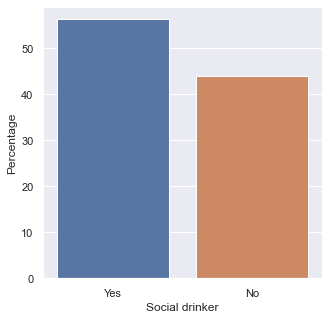

In [24]:


drinker_counts= df_main['Social drinker'].value_counts().rename_axis('Social drinker').reset_index(name='count')


drinker_num = [ i for i in range(0,2)]
if_drinker= ['No', 'Yes']


drinker_counts['Percentage'] = (drinker_counts['count']*100)/(drinker_counts['count'].sum())
drinker_counts['Social drinker'] = drinker_counts['Social drinker'].map(dict(zip(drinker_num,if_drinker)))



sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(y='Percentage', x ='Social drinker', data = drinker_counts)

### What percentage of the absentee group were social smokers ?


   Social smoker  count
0              0    650
1              1     46


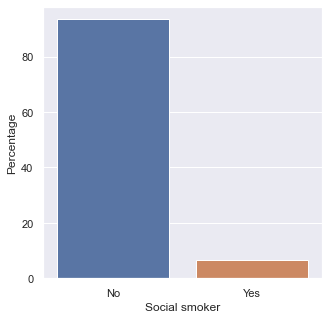

In [25]:
smoker_counts= df_main['Social smoker'].value_counts().rename_axis('Social smoker').reset_index(name='count')
print(smoker_counts)

smoker_num = [ i for i in range(0,2)]
if_smoker= ['No', 'Yes']


smoker_counts['Percentage'] = (smoker_counts['count']*100)/(smoker_counts['count'].sum())
smoker_counts['Social smoker'] = smoker_counts['Social smoker'].map(dict(zip(smoker_num,if_smoker)))



sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(y='Percentage', x ='Social smoker', data = smoker_counts)